In [1]:
#include <TChain.h>
#include <vector>
#include <TFile.h>
#include <iostream>
#include <string>
#include <stdio.h>

In [2]:
TFile *f_sig = TFile::Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_345324.ggH125_WW2lep.2lep.root");
TTree *t_sig = (TTree*)f_sig->Get("mini");
int n_sig_events = t_sig->GetEntries();
cout << n_sig_events << endl;

628685


In [3]:
TFile *f_bkg = TFile::Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_363492.llvv.2lep.root");
TTree *t_bkg = (TTree*)f_bkg->Get("mini");
int n_bkg_events = t_bkg->GetEntries();
cout << n_bkg_events << endl;

3409043


In [4]:
//int_t jet_n_sig = -1; 
UInt_t jet_n_sig = -1;
float_t met_et_sig = 0;

t_sig->SetBranchAddress("jet_n", &jet_n_sig);
t_sig->SetBranchAddress("met_et", &met_et_sig);

In [5]:
//int_t jet_n_bkg = -1; 
UInt_t jet_n_bkg = -1;
float_t met_et_bkg = 0;

t_sig->SetBranchAddress("jet_n", &jet_n_bkg);
t_bkg->SetBranchAddress("met_et", &met_et_bkg);

In [6]:
//Definición de los histogramas

TCanvas *canvas = new TCanvas();
TH1F *hist_sig_met = new TH1F("h_sig_met", "Missing transverse energy; Met_et [GeV] ; Events", 20, 0, 200);
TH1F *hist_bkg_met = new TH1F("h_bkg_met", "Missing transverse energy; Met_et [GeV] ; Events", 20, 0, 200);
TH1F *hist_sig_jet_n = new TH1F("hist_sig_jet_n","Example plot: Number of Jets",10,0,10);
TH1F *hist_bkg_jet_n = new TH1F("hist_bkg_jet_n","Example plot: Number of Jets",10,0,10);

In [7]:
int nentries_sig = 0;
for (int ii=0; ii<n_sig_events; ii++)
{
    t_sig->GetEntry(ii);
    hist_sig_met->Fill(met_et_sig/1000);
    hist_sig_jet_n->Fill(jet_n_sig);
    nentries_sig++;
}

int nentries_bkg = 0;
for (int jj=0; jj<n_bkg_events; jj++)
{
    t_bkg->GetEntry(jj);
    hist_bkg_met->Fill(met_et_bkg/1000);
    hist_bkg_jet_n->Fill(jet_n_sig);
    nentries_bkg++;
}

cout << nentries_sig << endl;
cout << nentries_bkg << endl;
cout << "Done!" << endl;

628685
3409043
Done!


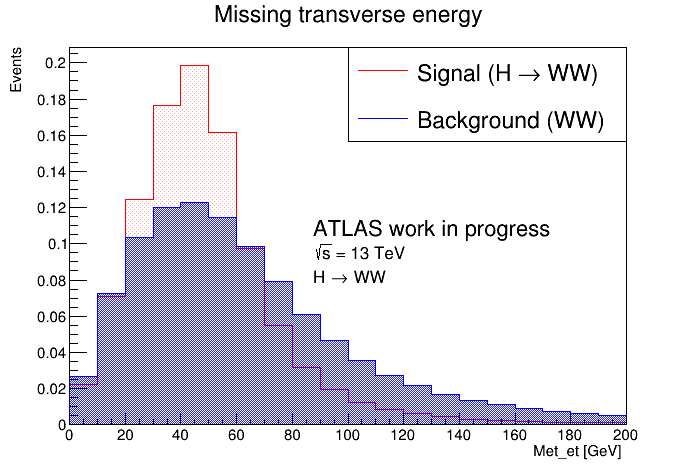

625850
3.29318e+06


In [8]:
Float_t scale_sig_met = hist_sig_met->Integral();
hist_sig_met->Scale(1/scale_sig_met);

Float_t scale_bkg_met = hist_bkg_met->Integral();
hist_bkg_met->Scale(1/scale_bkg_met);

cout << scale_sig_met << endl;
cout << scale_bkg_met << endl;

hist_sig_met->SetFillStyle(3003);
hist_sig_met->SetFillColorAlpha(kRed, 0.35);
hist_sig_met->SetLineColor(2);

hist_bkg_met->SetFillStyle(3001);
hist_bkg_met->SetFillColorAlpha(kBlue, 0.85);
hist_bkg_met->SetLineColor(4);

TLegend *leg = new TLegend(0.5, 0.7, 0.9, 0.9);
leg->AddEntry(hist_sig_met, "Signal (H #rightarrow WW)","l");
leg->AddEntry(hist_bkg_met, "Background (WW)","l");

hist_sig_met->SetStats(0);
hist_bkg_met->SetStats(0);

hist_sig_met->Draw("hist"); 
hist_bkg_met->Draw("histsame"); //Para graficar ambos histogramas en el mismo canvas se pone "histsame"

TStyle *atlasStyle = new TStyle("ATLAS","Atlas style");
Int_t icol=0; // WHITE
atlasStyle->SetFrameBorderMode(icol);
atlasStyle->SetFrameFillColor(icol);
atlasStyle->SetCanvasBorderMode(icol);
atlasStyle->SetCanvasColor(icol);
atlasStyle->SetPadBorderMode(icol);
atlasStyle->SetPadColor(icol);
atlasStyle->SetStatColor(icol);
atlasStyle->SetPaperSize(20,26);
atlasStyle->SetPadTopMargin(0.05);
atlasStyle->SetPadRightMargin(0.05); 
atlasStyle->SetPadBottomMargin(0.16);
atlasStyle->SetPadLeftMargin(0.16); 
atlasStyle->SetTitleXOffset(1.4);
atlasStyle->SetTitleYOffset(1.4);
Int_t font=42; // Helvetica
Double_t tsize=0.05;
atlasStyle->SetTextFont(font);
atlasStyle->SetTextSize(tsize);
atlasStyle->SetLabelFont(font,"x");
atlasStyle->SetTitleFont(font,"x");
atlasStyle->SetLabelFont(font,"y");
atlasStyle->SetTitleFont(font,"y");
atlasStyle->SetLabelFont(font,"z");
atlasStyle->SetTitleFont(font,"z");
atlasStyle->SetLabelSize(tsize,"x");
atlasStyle->SetTitleSize(tsize,"x");
atlasStyle->SetLabelSize(tsize,"y");
atlasStyle->SetTitleSize(tsize,"y");
atlasStyle->SetLabelSize(tsize,"z");
atlasStyle->SetTitleSize(tsize,"z");
atlasStyle->SetMarkerStyle(20);
atlasStyle->SetMarkerSize(1.2);
atlasStyle->SetHistLineWidth(2.);
atlasStyle->SetLineStyleString(2,"[12 12]"); // postscript dashes
atlasStyle->SetEndErrorSize(0.);
atlasStyle->SetOptTitle(0);
atlasStyle->SetOptStat(0);
atlasStyle->SetOptFit(0);
atlasStyle->SetPadTickX(1);
atlasStyle->SetPadTickY(1);

TLatex l;
l.SetNDC();
l.SetTextFont(42);
l.SetTextColor(kBlack);
l.SetTextSize(0.05);  
l.DrawLatex(0.45,0.5,"ATLAS work in progress");

TLatex o;
o.SetNDC();
o.SetTextFont(42);
o.SetTextColor(kBlack);
o.SetTextSize(0.04);
double dely = 0.05; 
o.DrawLatex(0.45,0.5-dely, Form("#sqrt{s} = 13 TeV"));
o.DrawLatex(0.45,0.45-dely, Form("H #rightarrow WW"));
//o.DrawLatex(0.4,0.5-dely,"#it{for education} $m_{\gamma}$");
//l2.DrawLatex(0.18,0.79, Form("#sqrt{s} = 13 TeV, 10 fb^{-1}"));

leg->Draw();
canvas->Draw();

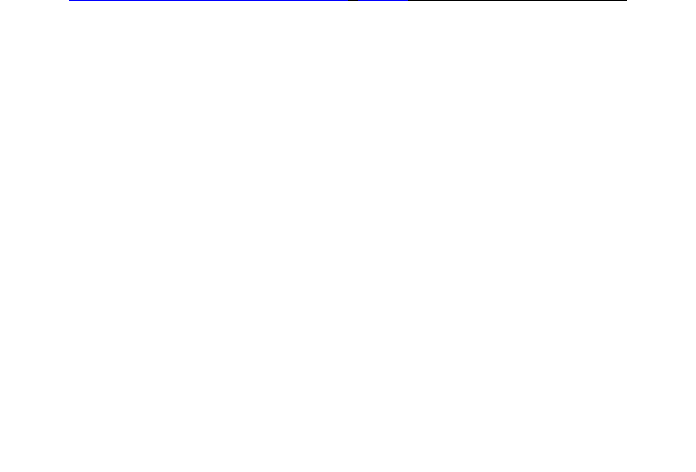

0
0


In [9]:
Float_t scale_sig_jet_n = hist_sig_jet_n->Integral();
hist_sig_jet_n->Scale(1/scale_sig_jet_n);

Float_t scale_bkg_jet_n = hist_bkg_jet_n->Integral();
hist_bkg_jet_n->Scale(1/scale_bkg_jet_n);

cout << scale_sig_jet_n << endl;
cout << scale_bkg_jet_n << endl;

hist_sig_jet_n->SetFillStyle(3003);
hist_sig_jet_n->SetFillColorAlpha(kRed, 0.35);
hist_sig_jet_n->SetLineColor(2);

hist_bkg_jet_n->SetFillStyle(3001);
hist_bkg_jet_n->SetFillColorAlpha(kBlue, 0.45);
hist_bkg_jet_n->SetLineColor(4);

TLegend *leg = new TLegend(0.5, 0.7, 0.9, 0.9);
leg->AddEntry(hist_sig_jet_n, "Signal (H #rightarrow WW)","l");
leg->AddEntry(hist_bkg_jet_n, "Background (WW)","l");

hist_sig_jet_n->SetStats(0);
hist_bkg_jet_n->SetStats(0);

hist_sig_jet_n->Draw("hist"); //
hist_bkg_jet_n->Draw("histsame"); //Para graficar ambos histogramas en el mismo canvas se pone "histsame"
leg->Draw();
canvas->Draw();